In [ ]:
# https://drive.google.com/file/d/13Wng5vLnuzmTX3zpDpRHRvUWFc_7GzOy/view?usp=sharing
# https://drive.google.com/file/d/1XMMdJcKMejiRdxWQQHhaBqgKur9lI64Q/view?usp=sharing
# # Load datasets
!pip install --upgrade --no-cache-dir gdown
!gdown  13Wng5vLnuzmTX3zpDpRHRvUWFc_7GzOy
!gdown 1XMMdJcKMejiRdxWQQHhaBqgKur9lI64Q

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From (original): https://drive.google.com/uc?id=13Wng5vLnuzmTX3zpDpRHRvUWFc_7GzOy
From (redirected): https://drive.google.com/uc?id=13Wng5vLnuzmTX3zpDpRHRvUWFc_7GzOy&confirm=t&uuid=9c83df73-ac32-463a-a02e-e5706261100b
To: /content/data_fault.mat
100% 2.95M/2.95M [00:00<00:00, 26.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1XMMdJcKMejiRdxWQQHhaBqgKur9lI64Q
From (redirected): https://drive.google.com/uc?id=1XMMdJcKMejiRdxWQQHhaBqgKur9lI64Q&confirm=t&uuid=ecad47dc-5b80-4ed4-abdc-931f19196695
To: /content/data_normal.mat
100% 7.77M/7.77M [00:00<00:00, 49.6MB/s]


In [ ]:
# Problem 2.1 Fault data Classification
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

data1 = loadmat('data_fault.mat')
data2 = loadmat('data_normal.mat')
# Class of normal data
data_normal = data2['X100_DE_time']
print(data_normal.shape)
# Class of fault data
data_fault = data1['X108_DE_time']
print(data_fault.shape)



(485643, 1)
(122917, 1)


In [ ]:
# Problem 2.2 (آ)
import numpy as np

def create_samples_matrix(data, num_samples=150, sample_length=250):
    samples_matrix = np.zeros((num_samples, sample_length))
    for i in range(num_samples):
        start_index = i * sample_length
        end_index = start_index + sample_length
        samples_matrix[i, :] = data[start_index:end_index].flatten()
    return samples_matrix

samples_matrix_normal = create_samples_matrix(data_normal)
print(samples_matrix_normal.shape)

samples_matrix_fault = create_samples_matrix(data_fault)
print(samples_matrix_fault.shape)


(150, 250)
(150, 250)


(300, 2)
(300, 2)
(300, 2)
(300, 2)
(300, 2)
(300, 2)
(300, 2)
(300, 2)


<ipython-input-4-bf44a81eb812>:75: RuntimeWarning: invalid value encountered in scalar divide
  return (sum_of_squares)/RMS(x)


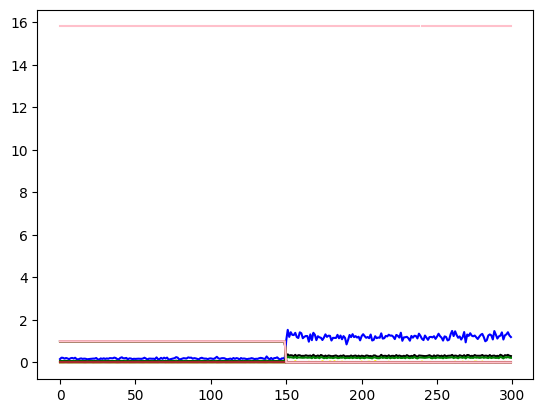

In [ ]:
# Problem 2.2 (ب)

import numpy as np
import matplotlib.pyplot as plt

# Create Mean feature 1
# Create fault and normal matrix data with labels
data_Extracted = np.concatenate([
    [(np.mean(samples_matrix_normal[i, :]), 1) for i in range(150)],
    [(np.mean(samples_matrix_fault[i, :]), 0) for i in range(150)]
])

print(data_Extracted.shape)

# Create Peak feature 2
data_Extracted1 = np.concatenate([
    [(np.max(np.abs(samples_matrix_normal[i, :])), 1) for i in range(150)],
    [(np.max(np.abs(samples_matrix_fault[i, :])), 0) for i in range(150)]
])

print(data_Extracted1.shape)
# Create std feature 3
data_Extracted2 = np.concatenate([
    [(np.std((samples_matrix_normal[i, :])), 1) for i in range(150)],
    [(np.std((samples_matrix_fault[i, :])), 0) for i in range(150)]
])

print(data_Extracted2.shape)
# Create Absolute mean feature 4
data_Extracted3 = np.concatenate([
    [(np.mean(np.abs(samples_matrix_normal[i, :])), 1) for i in range(150)],
    [(np.mean(np.abs(samples_matrix_fault[i, :])), 0) for i in range(150)]
])

print(data_Extracted3.shape)
#  Create RMS feature 5
def RMS(x):
  sum_of_squares=0
  for i in range(len(x)):
    sum_of_squares = (x[i])**2
    return np.sqrt(sum_of_squares/len(x))
data_Extracted4 = np.concatenate([
    [(RMS((samples_matrix_normal[i, :])), 1) for i in range(150)],
    [(RMS((samples_matrix_fault[i, :])), 0) for i in range(150)]
])
print(data_Extracted4.shape)

#  Create Square Mean Root  SMR feature 6
def SMR(x):
  sum_of_squares=0
  for i in range(len(x)):
    sum_of_squares =np.abs(x[i])
    return (np.sqrt(sum_of_squares)/len(x))**2
data_Extracted5 = np.concatenate([
    [(SMR((samples_matrix_normal[i, :])), 1) for i in range(150)],
    [(SMR((samples_matrix_fault[i, :])), 0) for i in range(150)]
])
print(data_Extracted5.shape)
#  Create Square Mean Root  SMR feature 7
def Peak_to_Peak(x):
  sum_of_squares=0
  for i in range(len(x)):
    sum_of_squares =np.max(x[i])-np.min(x[i])
    return (sum_of_squares)
data_Extracted6 = np.concatenate([
    [(Peak_to_Peak((samples_matrix_normal[i, :])), 1) for i in range(150)],
    [(Peak_to_Peak((samples_matrix_fault[i, :])), 0) for i in range(150)]
])
print(data_Extracted6.shape)
#  Create Crest Factor feature 8
def CF(x):
  sum_of_squares=0
  for i in range(len(x)):
    sum_of_squares =np.max(np.abs(x[i]))
    return (sum_of_squares)/RMS(x)
data_Extracted7 = np.concatenate([
    [(CF((samples_matrix_normal[i, :])), 1) for i in range(150)],
    [(CF((samples_matrix_fault[i, :])), 0) for i in range(150)]
])
print(data_Extracted7.shape)
# plot result of new datas
plt.figure
plt.plot(data_Extracted,'r')
plt.plot(data_Extracted1,'b')
plt.plot(data_Extracted2,'k')
plt.plot(data_Extracted3,'g')
plt.plot(data_Extracted4,'yellow')
plt.plot(data_Extracted5,'gray')
plt.plot(data_Extracted6,'brown')
plt.plot(data_Extracted7,'pink')

Ddata shuffling

In [ ]:
# problem 2.2 (ج)
data_Extracted_S = np.random.permutation(data_Extracted)

data_Extracted_shuffled = data_Extracted_S[np.random.permutation(data_Extracted.shape[0]), :]
print("Real data, Shuffle data:")
data_Extracted, data_Extracted_S
# Cerate train and test data on new shuffle data
# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(data_Extracted3[:,0], data_Extracted[:,1], test_size=0.2, random_state=16)
print("X_test, y_test")




Real data, Shuffle data:
X_test, y_test


**Normalize Dataset**

In [ ]:
# problem 2.2 (د)

def min_max_scaler(data):

  min_values = np.min(data, axis=0)
  max_values = np.max(data, axis=0)
  return (data - min_values) / (max_values - min_values)
normalized_data = min_max_scaler(data_Extracted3)

print(normalized_data)

[[0.06630176 1.        ]
 [0.0510146  1.        ]
 [0.0732909  1.        ]
 [0.06321062 1.        ]
 [0.06875101 1.        ]
 [0.03702198 1.        ]
 [0.0260201  1.        ]
 [0.05813642 1.        ]
 [0.02278193 1.        ]
 [0.08821229 1.        ]
 [0.07077352 1.        ]
 [0.01666061 1.        ]
 [0.02137263 1.        ]
 [0.04992445 1.        ]
 [0.06712296 1.        ]
 [0.04058289 1.        ]
 [0.03479148 1.        ]
 [0.04969495 1.        ]
 [0.         1.        ]
 [0.04171607 1.        ]
 [0.05043008 1.        ]
 [0.06937139 1.        ]
 [0.02172047 1.        ]
 [0.05531064 1.        ]
 [0.0485797  1.        ]
 [0.01279847 1.        ]
 [0.02026814 1.        ]
 [0.05041932 1.        ]
 [0.03353279 1.        ]
 [0.08700022 1.        ]
 [0.05235935 1.        ]
 [0.0729574  1.        ]
 [0.03528635 1.        ]
 [0.02843348 1.        ]
 [0.05302276 1.        ]
 [0.04437689 1.        ]
 [0.05820814 1.        ]
 [0.08429995 1.        ]
 [0.00795377 1.        ]
 [0.03425717 1.        ]


**LinearRegression**

In [ ]:
# Problem 2.3
def sigmoid(x):
    return 3 / (1 + np.exp(-x))
def logistic_regression(x, w):
    y_hat = sigmoid(np.dot(x, w))
    return y_hat
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [ ]:
from sklearn.metrics import accuracy_score
X_train = np.array(X_train)

w = .5
# print(w.shape)

eta = 0.1
n_epochs = 900 #N
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(X_train, w)
    y_pred =np.round(logistic_regression(X_test, w))


    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(X_train, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)
print('Accurscy:')
accuracy(y_test, y_pred)

Accurscy:


<ipython-input-7-e075f8c27e3a>:8: RuntimeWarning: invalid value encountered in log
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
<ipython-input-7-e075f8c27e3a>:8: RuntimeWarning: divide by zero encountered in log
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
<ipython-input-7-e075f8c27e3a>:8: RuntimeWarning: invalid value encountered in multiply
  loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))


0.9666666666666667

Text(0.5, 1.0, 'Predicted Labels for test data')

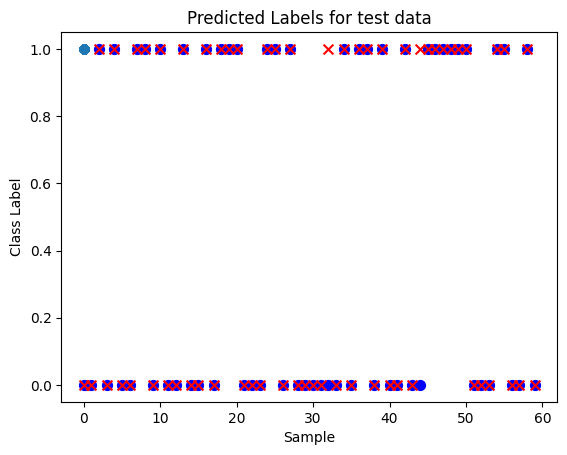

In [ ]:
X = data_Extracted3[:,0]
y = data_Extracted3[:,1]
plt.figure(1)
plt.scatter(X,y)

 # Plot the real labels
plt.figure
plt.scatter(range(len(y_test)), y_test, c='b', marker='o', label='Real Labels', s=50)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Real Labels')
# Plot the predicted labels
plt.scatter(range(len(y_pred)), y_pred, c='r', marker='x', label='Predicted Labels', s=50)
plt.xlabel('Sample')
plt.ylabel('Class Label')
plt.title('Predicted Labels for test data')


In [ ]:
# Linear Regressions (2.4)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
iteration=1000  # Sample
# Training of Logistic Regression model
logistic_model = LogisticRegression(max_iter=iteration,  random_state=16)
logistic_model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
predict = logistic_model.predict(X_test.reshape(-1, 1))
# Validation of Accuracy
Ac_train = logistic_model.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
Ac_test = logistic_model.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))
print("Logistic Regression Model:")
print("Training accuracy, Testing accuracy:", Ac_train, Ac_test)

Logistic Regression Model:
Training accuracy, Testing accuracy: 1.0 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Predicted Labels for test data')

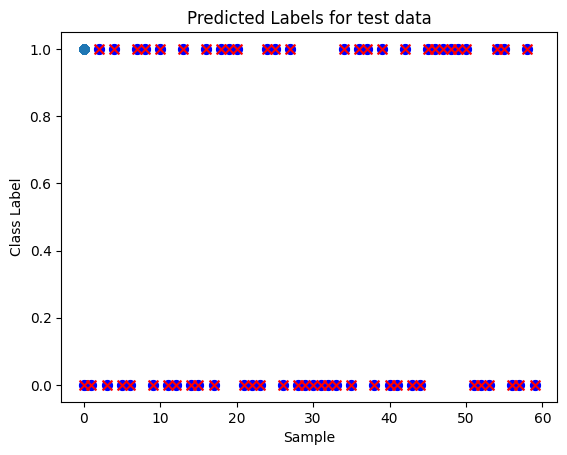

In [ ]:
from mlxtend.plotting import plot_decision_regions
# Assuming X has more than 2 features, add filler values
filler_feature_values = {2: 0}  # Filler value for the 3rd feature
X = data_Extracted3[:,0]
y = data_Extracted3[:,1]
y_pred1 = logistic_model.predict(X_test.reshape(-1,1))

plt.figure(1)
plt.scatter(X,y)

 # Plot the real labels
plt.figure
plt.scatter(range(len(y_test)), y_test, c='b', marker='o', label='Real Labels', s=50)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Real Labels')
# Plot the predicted labels
plt.scatter(range(len(y_pred1)), y_pred1, c='r', marker='x', label='Predicted Labels', s=50)
plt.xlabel('Sample')
plt.ylabel('Class Label')
plt.title('Predicted Labels for test data')